Kantorovich’s formulation:

$$
\begin{eqnarray}
\min && \sum_{j=1}^n y_j \\ 
&& \sum_{j=1}^n x_{ij} = d_i\\
&& \sum_{i=1}^m w_i x_{ij}\le L y_j\\
&& x_{ij}\ge 0\\
&& y_j \in \{0,1\}^m
\end{eqnarray}
$$

## Example 1: Panel Doors 

In a company that makes doors, the standard length of a plank is 30cm based on the present cutting technique. A panel door consists of three different types of the wood material of fixed width 84cm from which each required length is obtained. These are lengths 30cm, 28cm, 25cm, 20cm, 15cm, 12cm, 10cm, 7cm, 5cm and 2cm. For a small panel, we need for each of the length quantities 5, 2, 3, 1, 4, 5 ,6, 10, 8, and 5 respectively. How many plank is required to make this door?

In [1]:
from mip import Model, xsum, BINARY, INTEGER


# Example 1
n = 30 # maximum number of bars
L = 30 # standard bar length


m = 10 # number of requests
w = [30, 28, 25, 20, 15, 12, 10, 7, 5, 2] # size of each item
d = [5, 2, 3, 1, 4, 5 ,6, 10, 8, 5] # demand for each item

# kantorovich formulation with items and demands
def Kant_1(L,d,w,n):
    
    m = len(w)
    # creating the model
    model = Model()
    _set = []
    x = {(i, j): model.add_var(obj=0, var_type=INTEGER, name="x[%d ,%d ]" % (i, j)) for i in range(m) for j in range(n)}
    y = {j: model.add_var(obj=1, var_type=BINARY, name="y[%d ]" % j) for j in range(n)}

    # constraints
    for i in range(m):
        model.add_constr(xsum(x[i, j] for j in range(n)) == d[i])
    for j in range(n):
        model.add_constr(xsum(w[i] * x[i, j] for i in range(m)) <= L * y[j])

    # additional constraints to reduce symmetry
    for j in range(1, n):
        model.add_constr(y[j - 1] >= y[j])

    # optimizing the model
    model.optimize()
    #for var in model.vars:

        # to print out the non-zero values
        #if (var.x> 1e-9):

    return model.objective_value

In [2]:
Kant_1(L,d,w,n)

21.0

## Example 2

we wish to cut bars of the following lengths

L1 = 13
L2 = 15
L3 = 20
L4 = 9
L5 = 10
L6 = 18
L7 = 22
L8 = 19
from standard bars of length 100. 
The requirements of the above bars are
D1 = 109
D2 = 87
D3 = 92
D4 = 32
D5 =38
D6 = 47
D7 = 91
D8 = 12.

Formulate and solve the problem of finding the minimum number of standard bars needed to fulfill the whole demand



$$
\begin{eqnarray}
\min && \sum_{j=1}^n y_j \\ 
&& \sum_{j=1}^n x_{ij} = d_i\\
&& \sum_{i=1}^m w_i x_{ij}\le L y_j\\
&& x_{ij}\ge 0\\
&& y_j \in \{0,1\}^m
\end{eqnarray}
$$

In [ ]:
w = [13,15,20,9,10,18,22,19] # size of each item
d = [109,87,92,32,38,47,91,12]# demand for each item
r = 0
i = 0

while (i<8):
    r+=w[i]*d[i]
    i+=1
r

In [ ]:
sum([(w[i]*d[i]) for i in range(8)])

In [ ]:
from mip import Model, xsum, BINARY, INTEGER
n = 1000# maximum number of bars
L = 100 # bar length



w = [8,7,6] # size of each item
d = [40,20,5] # demand for each item
m = len(d)

# creating the model
model = Model()
x = {(i, j): model.add_var(obj=0, var_type=INTEGER, name="x[%d,%d]" % (i, j)) for i in range(m) for j in range(n)}
y = {j: model.add_var(obj=1, var_type=BINARY, name="y[%d]" % j) for j in range(n)}

# constraints
for i in range(m):
    model.add_constr(xsum(x[i, j] for j in range(n)) == d[i])
for j in range(n):
    model.add_constr(xsum(w[i] * x[i, j] for i in range(m)) <= L * y[j])

# additional constraints to reduce symmetry
for j in range(1, n):
    model.add_constr(y[j - 1] >= y[j])

# optimizing the model
model.optimize()

 #printing the solution
print('')
print('Total number of bars needed: {model.objective_value:.3} '.format(**locals()))

print('Solution: ', end='')
for var in model.vars:
    if var.x > 1e-9: 
        #count+=1
        print('{var.name} = {var.x} '.format(**locals()))
print(' ', end='')


In [2]:
#https://scipbook.readthedocs.io/en/latest/bpp.html

# takes:
# w = a one dimensionaal list containing the length of the part types
# d = a one dimensionaal list containing the demands of the part types respectively
# L = the length of the standard stock

def First_Fit_Decreasing(w, d, L):
    # empty list to take the all demmands
    s=[] 
    
    # check if the user has a valid input for the width and the their demands
    if len(w)==len(d):
        
        # loops for indices 0,1,2,...,length(w) 
        for j in range(len(w)):
            
            #  loops for indices 0,1,2,...,d[j]
            for i in range(d[j]):
                
                # keeps storing the corresponding w values
                s.append(w[j])
                
    # sorts all the demands of different part types in descendiing order           
    demands = sorted(s, reverse=True)   
    
    # A list to store the space remaining in bins 
    remain = [L]
    
    # inializes the solution as an empty list of lists
    solution = [[]]
    
    # loops through all items in demands (already sorted in descending order)
    for item in demands:
        
        # for each values in a turple of values and their index 
        for k,free in enumerate(remain):
            
            # if the remaining space in the bin can take the item
            if item <= free:
                
                # remove the size of the item from the size of the bin in was placed inside
                remain[k] -= item
                
                # keep the item inside a bin in the solution list
                solution[k].append(item)
                break
        # if size of the item is greater than the space remaining        
        else:
            
            # keep the item in another bin
            solution.append([item])
            
            # a list containing left overs of the bins after they can't accomodate new items
            remain.append(L-item)
            
     
    # returns the len o
    return len(solution), solution, remain
w = [13,15,20,9,10,18,22,19] # size of each item
d = [109,87,92,32,38,47,91,12]
L = 100# demand for each item
x,y,z=First_Fit_Decreasing(w, d, L)

In [10]:
import numpy as np
import random

In [3]:
import numpy as np
import random


np.random.seed(1)
w = np.random.randint(20,50, size = 5)
np.random.seed(10)
d = np.random.randint(10,66, size = 5)
np.random.seed(10)
L = np.random.randint(100,200)
n = First_Fit_Decreasing(w, d, L)
n

(51,
 [[32, 32, 32],
  [32, 32, 32],
  [32, 32, 32],
  [32, 32, 32],
  [32, 32, 32],
  [32, 32, 32],
  [32, 32, 32],
  [32, 32, 32],
  [32, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 31],
  [31, 31, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 29, 29],
  [29, 28, 28],
  [28, 28, 28, 25],
  [28, 28, 28, 25],
  [28, 28, 25, 25],
  [25, 25, 25, 25],
  [25, 25, 25, 25],
  [25, 25, 25, 25],
  [25, 25, 25]],
 [13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  15,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  18,
  22,
  22

## Probability of recovering a defect in a bin packing problem.

Here is a text file that gives the solution of a bin packing problem with 100 items and bin length W=100. 
After [ITEMSET], the list of item lengths is reported. 

The optimal solution consists of 25 bins. 

After [PATTERNSET], you read the list of patterns (i.e., bins filled with items), encoded in this way:
n : w_1, ..., w_n : p1 : p2

The first number (n) gives how many items are packed in the bin. Then you have n numbers that give the length of those items. Please neglect the two numbers after the second colon, that is, p1 and p2.

So for example, the first pattern describes a bin filled with three items of length 61, 29 and 10. As 61+29+10=100=W, this bin cannot be recovered in case of defect, wherever it falls. The same occurs for the second pattern, {69, 28, 3} but not for the third, {74, 25}: in this latter case, in fact, 74+25 = 99 < 100 and you have a unit leftover that can be used to reconfigure the pattern. 


xi = 1 if item i is placed in the left region, 0 otherwise
min 	w1x1 + w2x2 + … + wnxn  
s.t.	w1(1 – x1) + w2(1 – x2) + … + wn(1 – xn) < W – k – 1
If the optimum is < k, then a defect in the interval [k, k+1] can be recovered, otherwise not
Solve for k = 0, …, W – 1 (it is sufficient to solve it for k = 0, …, (W – 1)/2 
Count the number of cases in which optimum < k
This gives you the probability of recovering a random defect in [0, W]
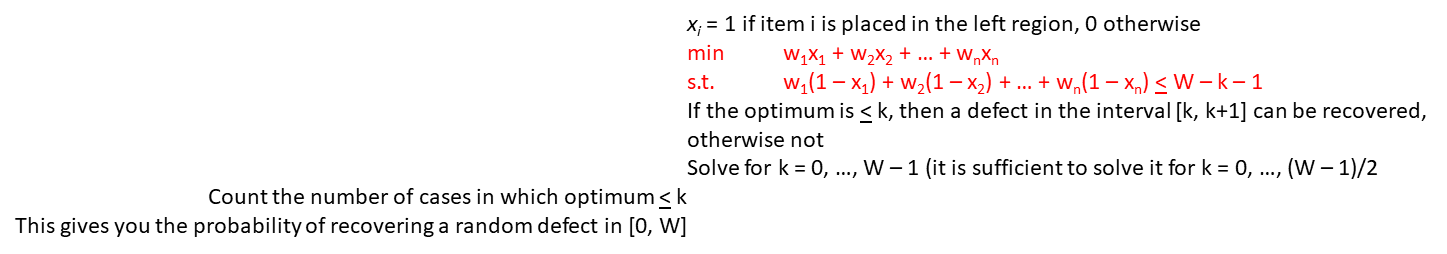

In [3]:
from mip import *
import random
random.seed(100)
import pandas as pd
import numpy as np

PATTERNSET = pd.DataFrame({'length':[3,3,2,2,2,2,2,2,2,1,1,1,1,1,2,2,2,3,2,2,3,3,3,1,2],
                        'patterns': [[61, 29, 10], [69, 28, 3], [74, 25],[85, 14], [88, 11], 
                                     [92, 7], [92, 7],[51, 49], [56, 44], [99],[99],[96],[96],
                                     [91],[87, 13],[76, 24],[72, 28],[40, 30, 30 ],[67, 33],[67, 33],
                                     [62, 21, 17],[52, 27, 20],[46, 23, 22],[86],[42, 40]
                                    ]})

# The standard bin length
L = 100

# List to keep the probabilities.
#prob = []

# probability of recovering a pattern when a random defect is present

def prob_P(L,w):
# for each bin 
    
    # length of pattern
    n = len(w)
    
    # creating the model
    model = Model()

    x = {i: model.add_var(obj=0, var_type=BINARY, name="x[%d]" % i) for i in range(n)}

    # initialize a counter
    count = 0
    
    # knapsack constraints
    for k in range(L):
        model.add_constr(xsum(w[j] * (1-x[j]) for j in range(n)) <= L - k- 1)

        # Objective value  
        model.objective = minimize(xsum(w[i]*x[i] for i in range(n)))

        # solving the model to optimality
        model.optimize();
        if model.objective_value <= k:
            count+=1
   
    return count/L

# Expected Economic Loss

## Problem 2

In [4]:
from mip import *

def l(L, w, t):
    le = L-sum(w)
    # creating the model
    model = Model()

    # defining the variables
    l = {j: model.add_var(obj=0, var_type=INTEGER, name="l[%d]" % j) for j in range(len(w))}
    r = {j: model.add_var(obj=1, var_type=INTEGER, name="r[%d]" % j) for j in range(len(w))}

    # constraints
    for i in range(len(w)):

        # either an item is placed to the right of a defect or to the left or not in the patttern
        model.add_constr(l[i] + r[i]  <= 1) 

    # size of items placed to the left of the defect must be less than the defect
    model.add_constr(xsum(w[i] * l[i] for i in range(len(w)))<= t)

    # size of items placed to the right of the must be less than the the length of the bin - defect
    model.add_constr(xsum(w[i] * r[i] for i in range(len(w)))<= L-t-1)

    # objective value
    model.objective = maximize(xsum(w[i]*(l[i] + r[i]) for i in range(len(w))))

    # optimizing the model
    model.optimize()
            
    return model.objective_value

In [3]:
[40, 30, 30].count(30)

2

## Probability of lossing as item

In [5]:
import numpy as np

def prob_i(L,w,item):
    
    # left-over
    le = L-sum(w)
    
    E = []
    Q = []
    
    for t in range(0,int(L/2)):

        # creating the model
        model = Model()
        l = {j: model.add_var(var_type=INTEGER, name="l[%d]" % j) for j in range(len(w))}
        r = {j: model.add_var(var_type=INTEGER, name="r[%d]" % j) for j in range(len(w))}

        # constraints
        for i in range(len(w)):

            # either an item is placed to the right of a defect or to the left
            model.add_constr(l[i] + r[i]  <= 1) 

        # size of items placed to the left of the defect must be less than the size of the defect
        model.add_constr(xsum(w[i] * l[i] for i in range(len(w)))<= t)

        # size of items placed to the right of the must be less than the the length of the bin defect size
        model.add_constr(xsum(w[i] * r[i] for i in range(len(w)))<= L-t)

        # objective value
        model.objective = maximize(xsum(w[i]*(l[i] + r[i]) for i in range(len(w))))

        # optimizing the model
        model.optimize()
        
        # to find the minimum l(P,t)
        if  (sum([w[i] for i in range(len(w))])-int(model.objective_value))==item:

            E.append(t)
            Q.append(t)
            Q.append(L-t-1)
            
    return (2*len(E)/L)/w.count(item)

In [4]:
prob_i(100,[1,9],1)

0.0

In [140]:

for i in p:
    A=[]
    for j in i:
        A.append(prob_i(100,i,j))
    print (A,i,prob_P(100,i))

[0.0, 0.62, 0.38] [45, 43, 12] 0.0
[0.26, 0.66] [63, 35] 0.08
[0.38, 0.34] [69, 24] 0.28
[0.28, 0.64] [64, 34] 0.08
[0.74, 0.1, 0.16] [87, 9, 4] 0.0
[0.44, 0.36, 0.2] [72, 23, 5] 0.0
[0.8, 0.2] [90, 10] 0.0
[0.0, 0.38, 0.54] [45, 37, 17] 0.08
[0.4, 0.6] [70, 30] 0.0
[0.82, 0.06] [91, 6] 0.12
[0.42, 0.58] [71, 29] 0.0
[1.0] [100] 0.0
[0.98] [99] 0.02
[0.96] [98] 0.04
[0.96] [98] 0.04
[0.96] [98] 0.04
[0.0, 0.34, 0.66] [43, 37, 20] 0.0
[0.56, 0.44] [78, 22] 0.0
[0.38, 0.62] [69, 31] 0.0
[0.68, 0.12] [84, 11] 0.2
[0.16, 0.84] [58, 42] 0.0
[0.16, 0.8] [58, 41] 0.04
[0.54, 0.38] [77, 21] 0.08
[0.68] [84] 0.32
[0.0, 0.4] [46, 37] 0.6


In [67]:
w=[30,30,30]

In [68]:
[prob_i(100,w,m) for m in w]

[0.19999999999999998, 0.19999999999999998, 0.19999999999999998]

In [87]:
prob_i(100,[45, 37, 17],17)

0.54

## Expected Economic Loss for a pattern set


In [21]:
# Expected economic loss for a pattern_set


## Expected Economic Loss for a single pattern

In [6]:
def eel(L,w):

    # left_over
    le=L-sum(w) 
    
    return le*prob_P(L,w)+sum([item*prob_i(L,w, item) for item in w])#*np.random.choice([0,1])

def eel_pat(L,Pattern_set):
    return sum([eel(L,pattern) for pattern in Pattern_set])

## Problem 3 

### A model that reconfigures the pattern set in order to reduce the EEL

In [7]:
from mip import *


L = 100 # standard bar length


# pattern reconfiguration 1
def PR_1(L,m,w):
    n = len(w)  # All items
    #m = 26  # optimum value

    # creating the model
    model = Model()
    _set = []

    # variables
    x = {(i, j): model.add_var(obj=0, var_type=BINARY, name="%d, %d" % (i, j)) for i in range(n) for j in range(m)}
    C_max = model.add_var(obj=1,name='C_max', var_type=INTEGER, lb=0.0, ub=L)

    # constraints
    for j in range(m):
        model.add_constr(xsum(w[i]*x[i,j] for i in range(n)) <= C_max)
    for i in range(n):
        model.add_constr(xsum(x[i,j] for j in range(m)) == 1)

    # define the objective
    model.objective = minimize(C_max)

    # optimizing the model
    model.optimize()
    # print out the objective
    #for var in model.vars:

        # to print out the non-zero values
    # print out the objective
    for var in model.vars:

        # to print out the non-zero values
        if (var.x> 1e-9):

            # remove C_max from the variables 
            if (var.name!='C_max'):
                _set.append(list(eval(var.name)))
    # to get all the bins used in the process
    bins=[]
    for res in _set:

        # keep the last value in the index of the x[i,j]
        bins.append(res[-1])

    # print out the unique bins
    Bin = np.unique(bins)

    # initialize a counter to run through all the available bins
    i = 0

    # an empty list to keep the patterns
    pattern_set=[]

    while i<len(Bin):

        # get the pattern set by keeping length of items that share bin in the same list 
        pattern_set.append([w[k] for k, x in enumerate(_set) if Bin[i] == x[-1]])
        i+=1 
    return pattern_set

In [67]:
from mip import *

# find a pattern set such that we minimize the difference between the largest pattern and the shortest pattern

def PR_2(L,m,w):

    n = len(w)  # All items
    #m = 25  # optimum value

    # creating the model
    model = Model(solver_name=GRB)
    _set = []

    # variables
    x = {(i, j): model.add_var(obj=0, var_type=INTEGER, name="%d, %d" % (i, j)) for i in range(n) for j in range(m)}
    C_max = model.add_var(obj=1,name='C_max', var_type=INTEGER, lb=0.0, ub=L)
    C_min = model.add_var(obj=2,name='C_min', var_type=INTEGER, lb=0.0, ub=L)

    # constraints
    for j in range(m):
        model.add_constr(xsum(w[i]*x[i,j] for i in range(n)) <= C_max)
        model.add_constr(xsum(w[i]*x[i,j] for i in range(n)) >= C_min)
    for i in range(n):
        model.add_constr(xsum(x[i,j] for j in range(m)) == 1)

    # define the objective
    model.objective = minimize(C_max-C_min)

    # optimizing the model
    model.optimize()
    # print out the objective
    for var in model.vars:

        # to print out the non-zero values
        if (var.x> 1e-9):

            # remove C_max from the variables 
            if var.name!='C_max':

                # remove C_min from the variables
                if var.name!='C_min':
                    _set.append(list(eval(var.name)))
    # to get all the bins used in the process
    bins=[]
    for res in _set:

        # keep the last value in the index of the x[i,j]
        bins.append(res[-1])

    # print out the unique bins
    Bin = np.unique(bins)

    # initialize a counter to run through all the available bins
    i = 0

    # an empty list to keep the patterns
    pattern_set=[]

    while i<len(Bin):

        # get the pattern set by keeping length of items that share bin in the same list 
        pattern_set.append([w[k] for k, x in enumerate(_set) if Bin[i] == x[-1]])
        i+=1 
    
    return pattern_set

In [68]:

# first item set
item_1 = [99,99,96,96,92,92,91,88,87,86,85,76,74,72,69,67,67,62,61,56,52,51,49,46,
     44,42,40,40,33,33,30,30,29,28,28,27,25,24,23,22,21,20,17,14,13,11,10,7,7,3]

# pattern set for optimum solution
pattern_set_1 = [[61, 29, 10], [69, 28, 3], [74, 25],[85, 14], [88, 11], 
                                     [92, 7], [92, 7],[51, 49], [56, 44], [99],[99],[96],[96],
                                     [91],[87, 13],[76, 24],[72, 28],[40, 30, 30 ],[67, 33],[67, 33],
                                     [62, 21, 17],[52, 27, 20],[46, 23, 22],[86],[42, 40]]

item_2 = [100,99,98,98,98,91,90,87,84,84,78,77,72,71,70,69,69,64,63,58,58,46,45,45,43,43,42,41,37,37,
             37,35,34,31,30,29,24,23,22,21,20,17,12,11,10,9,7,6,5,4]
#len(item);
pattern_set_2 = [[45, 43, 12],[63, 35],[69, 24],[64, 34],[87, 9, 4],[72, 23, 5],[ 90, 10],[45, 37, 17],[70, 30],[91, 6],
             [71, 29],[100],[99],[98],[98],[98],[43, 37, 20 ],[78, 22],[69, 31],[84, 11],[58, 42],[58, 41],[77, 21],
             [84],[46, 37]]



item_4 = [92, 89, 87, 84, 82, 82, 81, 75, 73, 71, 67, 67, 63, 59, 57, 56, 52, 49, 48, 47, 46, 41, 39, 38, 36, 35, 34, 34,
          30, 29, 26, 21, 20, 19, 18, 15, 15, 13, 11, 10, 10, 10, 9, 8, 8, 7, 6, 6, 6, 3]

pattern_set_4 = [[52, 48], [75, 15, 10], [82, 18], [67, 26, 7], [47, 38, 15], [63, 34, 3], [81, 19], [92, 8], [73, 21],
                 [87, 13], [89, 11], [56, 34, 10], [82, 10, 8], [71, 29],[84, 9, 6], [59, 35, 6], [41, 39, 20], [67, 30],
                 [49, 46], [57, 36]]

item_5 = [91, 88, 88, 87, 87, 86, 86, 85, 85, 84, 83, 80, 79, 78, 77, 70, 70, 68, 67, 66, 59, 52, 49, 48, 47, 47, 44, 42,
          38, 37, 37, 34, 34, 33, 31, 29, 27, 24, 21, 17, 16, 16, 15, 14, 8, 6, 5, 4, 2, 2]

pattern_set_5 = [[42, 34, 16, 8], [79, 17, 4], [86, 14], [87, 6, 5, 2], [83, 15, 2], [84, 16], [78, 21], [70, 29],
                 [70, 27], [38, 37, 24], [49, 47], [88], [87], [68, 31], [67, 33], [66, 34], [52, 48], [59, 37], [88], 
                 [86], [85], [85], [91], [47, 44], [80], [77]]

item_7 = [95 , 94, 93, 92, 87, 81, 81, 79, 78, 76, 75, 72, 72, 71, 70, 65, 62, 61 , 60, 55, 54, 54, 51, 49, 46, 45, 38, 
           38, 37, 36, 36, 36, 32, 31, 28, 27, 26, 25, 24, 24, 21, 20, 20, 17, 14, 10, 9, 7, 7, 3]

pattern_set_7 = [[60, 31, 9], [ 65, 32, 3],[70, 20, 10], [72, 28] , [78, 21] , [81, 17], [81, 14], [92, 7] ,[95], [61, 38] ,[94], 
                 [93, 7], [38, 36, 26], [76, 24] ,[75, 25] ,[55, 45] ,[54, 46],[51, 49],[37, 36, 27] ,[79, 20] ,[62, 36] ,
                 [72, 24] ,[87] ,[71] , [54]]


In [54]:
len(pattern_set_7)

25

In [69]:
def lo(L,w):

    # left_over
    le=L-sum(w) 
    return le*prob_P(L,w)

def lo_pat(L,Pattern_set):
    return sum([l_o(L,pattern) for pattern in Pattern_set])

def pl(L,w):
    
    return sum([item*prob_i(L,w, item) for item in w])

def pl_pat(L,Pattern_set):
    return sum([PL(L,pattern) for pattern in Pattern_set])

In [70]:
# finding the EEL for a pattern_set 10 times and fini

import statistics
def p_eel(L,p):
    i = 0
    c1 = []
    
    # while 
    while i<10:
        c1.append(eel_pat(L,p)) # appennd the EEL for each pattern
        i+=1
    ans = [c1, min(c1), max(c1), statistics.mean(c1), statistics.variance(c1)]  
    return ans

### Group 1, Instance 1

#### Model 1

In [41]:
p_eel(100,PR_2(100,25,item_1))

[[479.7,
  435.2799999999999,
  953.12,
  453.23999999999995,
  520.08,
  438.44000000000017,
  844.34,
  487.12000000000006,
  624.4200000000001,
  528.3600000000001],
 435.2799999999999,
 953.12,
 576.4100000000001,
 32548.168377777776]

In [45]:
eel_pat(100,pattern_set_1)

1342.86

In [15]:
eel_pat(100,PR_2(100,25,item_1))

1313.2600000000002

In [16]:
eel_pat(100,PR_2(100,26,item_1))

1269.7600000000002

In [17]:
eel_pat(100,PR_2(100,27,item_1))

1277.02

In [14]:
[eel_pat(100,PR_1(100,m,item_1)) for m in range(25,28)]

[1307.0800000000004, 1299.96, 1370.5599999999995]

In [24]:
p_eel(100,PR_1(100,25,item_1))

[[451.11999999999995,
  723.9600000000002,
  832.3,
  658.4200000000001,
  916.0000000000001,
  766.28,
  587.9600000000002,
  759.2800000000001,
  772.92,
  680.24],
 451.11999999999995,
 916.0000000000001,
 714.8480000000001,
 16929.643751111114]

In [ ]:
[655.3000000000002, 570.3000000000001, 545.96]

In [ ]:
w,l_o_pat(100, w)

In [25]:
p_eel(100, PR_1(100,26,item_1))

[[725.1199999999999,
  845.2199999999999,
  856.9599999999998,
  481.7999999999999,
  722.62,
  643.4999999999999,
  830.6799999999998,
  633.5000000000001,
  876.02,
  836.5599999999998],
 481.7999999999999,
 876.02,
 745.1979999999999,
 16486.005906666658]

In [42]:
p_eel(100, PR_2(100,26,item_1))

[[666.0599999999997,
  692.0199999999999,
  614.96,
  647.4399999999997,
  585.4199999999998,
  924.2799999999999,
  718.0799999999997,
  697.1199999999998,
  614.1999999999999,
  703.0999999999999],
 585.4199999999998,
 924.2799999999999,
 686.2679999999998,
 8940.089617777774]

In [ ]:
a.append(eel_pat(100, PR_1(100,26,item_1)))
a

In [174]:
eel_pat(100,PR_1(100,27,item_1))

1370.5599999999995

In [10]:
eel_pat(100,PR_2(100,27,item_1))

1277.02

In [163]:
eel_pat(100,PR_1(100,28,item_1))

1392.6399999999999

In [7]:
%matplotlib notebook
import matplotlib as mpl
import numpy as np
mpl.get_backend()
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


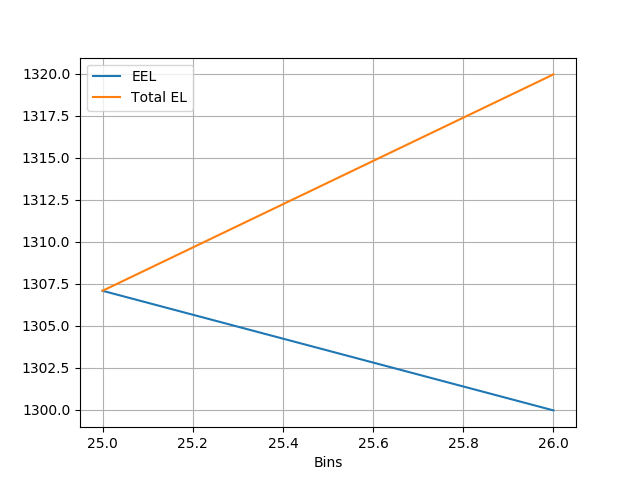

In [22]:
plt.figure()
y = range(25, 27)
z1 = [1307.0800000000004, 1299.96]
a1 = [1307.0800000000004, 1299.96+20]
plt.plot(y,z1, label = "EEL")
plt.plot(y,a1,label = "Total EL")
#plt.plot(y,np.linspace(0,100,num = 2), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
plt.grid()
plt.title='model 1'
plt.legend()

#### Model 2

In [171]:
eel_pat(100,PR_2(100,25,item_1))

1313.2600000000002

In [172]:
eel_pat(100,PR_2(100,26,item_1))

1273.7200000000003

In [176]:
eel_pat(100,PR_2(100,27,item_1))

1277.02

In [9]:
[eel_pat(100,PR_1(100,m,item_6)) for m in range(28,31)]

[1525.68, 1555.5600000000002, 1532.2600000000002]

### Group 1, Instance 2

#### Model 1

In [ ]:
i = 0
c1 = []
while i<10:
    c1.append(eel_pat(100, pattern_set_2))
c1

In [46]:
eel_pat(100,pattern_set_2)

1359.1000000000001

In [71]:
eel_pat(100,pattern_set_2)

1359.1000000000001

In [25]:
import statistics

In [26]:
p_eel(100,PR_1(100,25,item_2))

[[883.24,
  696.42,
  674.8,
  732.1600000000001,
  688.34,
  426.20000000000005,
  856.54,
  938.38,
  573.4399999999999,
  757.1399999999999],
 426.20000000000005,
 938.38,
 722.6659999999999,
 22870.68320444444]

In [43]:
p_eel(100,PR_2(100,25,item_2))

[[698.56,
  670.6199999999998,
  759.18,
  710.98,
  525.5400000000001,
  643.4799999999999,
  455.88000000000005,
  774.9799999999998,
  634.3999999999999,
  615.94],
 455.88000000000005,
 774.9799999999998,
 648.9559999999999,
 9850.001315555543]

In [ ]:
#p_eel(eel_pat(100,PR_1(100,25,item_2)))

In [44]:
pattern_set_2

In [46]:
lo_pat(L,PR_1(L,25,item_2)), pl_pat(L,PR_1(L,25,item_2))

(21.419999999999995, 1345.7999999999997)

In [180]:

eel_pat(100,PR_1(100,25,item_2))

1367.22

In [72]:
eel_pat(100,PR_1(100,25,item_2))

1367.22

In [47]:
lo_pat(L,PR_1(L,26,item_2)), pl_pat(L,PR_1(L,26,item_2))

(65.85999999999999, 1273.8)

In [48]:
lo_pat(L,PR_1(L,27,item_2)), pl_pat(L,PR_1(L,27,item_2))

(162.66000000000003, 1264.1399999999996)

In [49]:
lo_pat(L,PR_1(L,28,item_2)), pl_pat(L,PR_1(L,28,item_2))

(161.02, 1261.7600000000002)

In [27]:
p_eel(100,PR_1(100,26,item_2))

[[615.92,
  647.5600000000001,
  557.0,
  887.5200000000002,
  788.2200000000001,
  635.6599999999999,
  662.3400000000001,
  447.79999999999995,
  505.58,
  591.06],
 447.79999999999995,
 887.5200000000002,
 633.866,
 16478.63004888891]

In [44]:
p_eel(100,PR_2(100,26,item_2))

[[639.28,
  876.52,
  714.9799999999998,
  648.1199999999999,
  724.8999999999999,
  765.04,
  540.84,
  653.42,
  514.0799999999999,
  558.42],
 514.0799999999999,
 876.52,
 663.56,
 12382.931555555553]

In [181]:
eel_pat(100,PR_1(100,26,item_2))

1339.6599999999999

In [ ]:
p_eel(eel_pat(100,PR_1(100,26,item_2)))

In [182]:
eel_pat(100,PR_1(100,27,item_2))

1426.7999999999997

In [11]:
len(PR_1(100,27,item_2))

27

In [12]:
len(PR_1(100, 28, item_2))

27

<IPython.core.display.Javascript object>


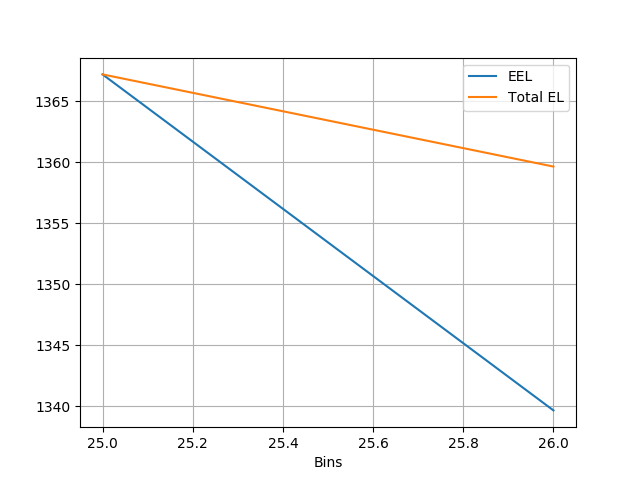

In [21]:
plt.figure()
y = range(25, 27)
z1 = [1367.22, 1339.6599999999999]
a1 = [1367.22, 1339.6599999999999+20]
plt.plot(y,z1, label = "EEL")
plt.plot(y,a1,label = "Total EL")
#plt.plot(y,np.linspace(0,200,num = 2), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
plt.grid()
plt.title='model 1'
plt.legend()

#### Model 2

In [183]:
eel_pat(100,PR_2(100,25,item_2))

1345.2999999999997

In [184]:
eel_pat(100,PR_2(100,26,item_2))

1316.28

In [ ]:
eel_pat(100,PR_2(100,27,item_2))

### Group 1, Instance 3

#### Model 1

In [10]:
eel_pat(100,pattern_set_3)

1717.3600000000001

In [11]:
eel_pat(100,PR_1(100,31,item_3))

1631.44

In [12]:
eel_pat(100,PR_1(100,32,item_3))

1727.1399999999999

<IPython.core.display.Javascript object>


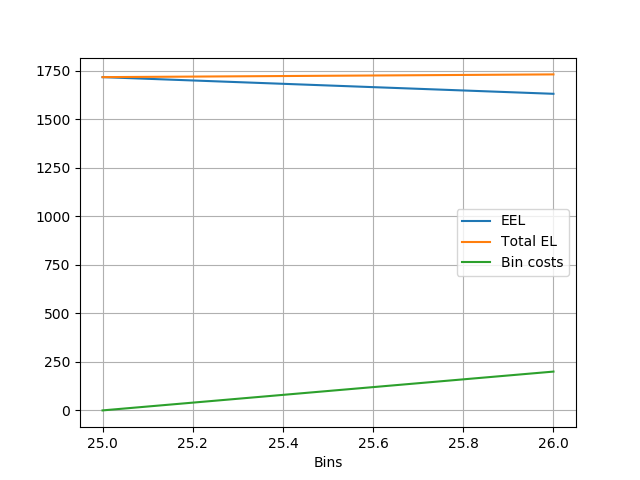

In [119]:
plt.figure()
y = range(25, 27)
z1 = [1717.3600000000001, 1631.44]
a1 = [1717.3600000000001, 1631.44+100]
plt.plot(y,z1, label = "EEL")
plt.plot(y,a1,label = "Total EL")
plt.plot(y,np.linspace(0,200,num = 2), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
plt.grid()
plt.title='model 1'
plt.legend()

#### Model 2

In [13]:
eel_pat(100,PR_2(100,31,item_3))

1621.9200000000003

In [14]:
eel_pat(100,PR_2(100,32,item_3))

1632.2800000000004

### Group 1, Instance 4

#### Model 1

In [16]:
eel_pat(100,pattern_set_4)

882.08

In [28]:
p_eel(100,PR_1(100,20,item_4))

[[412.08,
  506.69999999999993,
  297.68000000000006,
  308.26,
  436.53999999999996,
  348.78,
  610.3600000000001,
  463.52000000000004,
  504.4,
  456.76000000000005],
 297.68000000000006,
 610.3600000000001,
 434.50800000000004,
 9430.471484444448]

In [45]:
p_eel(100,PR_2(100,20,item_4))

[[411.44,
  281.6599999999999,
  433.5000000000001,
  463.85999999999996,
  536.36,
  454.13999999999993,
  333.63999999999993,
  582.3200000000002,
  639.04,
  457.50000000000006],
 281.6599999999999,
 639.04,
 459.346,
 11525.766048888898]

In [17]:
eel_pat(100,PR_1(100,20,item_4))

867.5400000000001

In [29]:
p_eel(100,PR_1(100,21,item_4))

[[581.2400000000001,
  179.72000000000003,
  451.76000000000005,
  423.21999999999997,
  129.82,
  578.6999999999999,
  449.59999999999997,
  468.46000000000004,
  416.66,
  505.78000000000003],
 129.82,
 581.2400000000001,
 418.49600000000004,
 22745.91998222222]

In [46]:
p_eel(100,PR_2(100,21,item_4))

[[364.35999999999996,
  484.2,
  438.17999999999995,
  339.4,
  511.70000000000005,
  470.25999999999993,
  603.5200000000001,
  356.9199999999999,
  450.79999999999995,
  549.24],
 339.4,
 603.5200000000001,
 456.858,
 7411.605817777786]

In [18]:
eel_pat(100,PR_1(100,21,item_4))

844.8000000000003

In [30]:
p_eel(100,PR_1(100,22,item_4))

[[580.9799999999999,
  546.34,
  460.0399999999999,
  573.02,
  480.88,
  462.94,
  224.24000000000004,
  521.88,
  397.3399999999999,
  405.24],
 224.24000000000004,
 580.9799999999999,
 465.28999999999996,
 11262.877799999997]

In [47]:
p_eel(100,PR_2(100,22,item_4))

[[444.62000000000006,
  359.11999999999995,
  325.71999999999997,
  409.06,
  448.59999999999997,
  460.06,
  547.38,
  368.74000000000007,
  416.19999999999993,
  463.38000000000005],
 325.71999999999997,
 547.38,
 424.288,
 4034.370151111112]

In [19]:
eel_pat(100,PR_1(100,22,item_4))

814.34

<IPython.core.display.Javascript object>


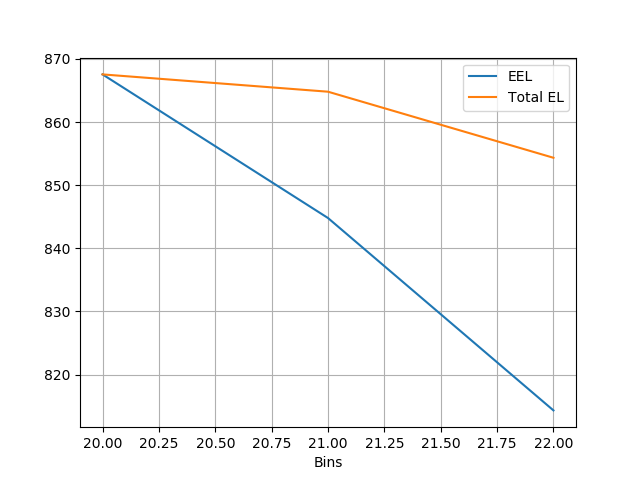

In [26]:
plt.figure()
y = range(20, 23)
z = [867.5400000000001, 844.8000000000003, 814.34]
a = [867.5400000000001, 844.8000000000003+20, 814.34+40]

plt.plot(y,z, label = "EEL")
plt.plot(y,a,label = "Total EL")
#plt.plot(y,np.linspace(0,200,num = 3), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
ax.grid()
plt.legend()

In [20]:
eel_pat(100,PR_1(100,23,item_4))

880.44

#### Model 2

In [21]:
eel_pat(100,PR_2(100,20,item_4))

878.74

In [22]:
eel_pat(100,PR_2(100,21,item_4))

847.36

In [23]:
eel_pat(100,PR_2(100,22,item_4))

817.9999999999999

In [20]:
eel_pat(100,PR_2(100,23,item_4))

850.82

### Group 1, Instance 5

#### Model 1

In [56]:
eel_pat(100,pattern_set_5)

1309.7399999999998

In [13]:
eel_pat(100,PR_1(100,26,item_5))

1306.8

In [14]:
eel_pat(100,PR_1(100,27,item_5))

1285.04

In [15]:
eel_pat(100,PR_1(100,28,item_5))

1262.6399999999999

In [19]:
eel_pat(100,PR_1(100,29,item_5))

1286.04

In [63]:
p_eel(100,PR_1(100,26,item_5))

[[696.5999999999999,
  806.44,
  561.7199999999999,
  525.2199999999998,
  838.86,
  483.1599999999999,
  587.6800000000001,
  579.92,
  781.16,
  720.8],
 483.1599999999999,
 838.86,
 658.156,
 15984.166293333345]

In [64]:
p_eel(100,PR_1(100,27,item_5))

[[572.8000000000001,
  498.93999999999994,
  592.3799999999998,
  553.5799999999999,
  613.56,
  675.16,
  735.9199999999997,
  697.2399999999998,
  634.3,
  692.3999999999999],
 498.93999999999994,
 735.9199999999997,
 626.6279999999999,
 5505.817084444436]

#### Model 2

In [26]:
eel_pat(100,pattern_set_5)

882.08

In [16]:
eel_pat(100,PR_2(100,26,item_5))

1284.96

In [18]:
eel_pat(100,PR_2(100,27,item_5))

1254.1800000000005

In [20]:
eel_pat(100,PR_2(100,28,item_5))

1258.8799999999999

In [25]:
p_eel(100,PR_2(100,26,item_5))

[[665.9799999999998,
  850.72,
  518.4,
  585.3,
  821.32,
  462.84000000000003,
  709.3399999999997,
  473.98,
  664.4199999999998,
  901.72],
 462.84000000000003,
 901.72,
 665.4019999999999,
 24681.210173333333]

In [26]:
p_eel(100,PR_2(100,27,item_5))

[[630.2799999999999,
  768.1,
  554.4399999999999,
  698.6399999999999,
  547.9199999999998,
  574.2599999999999,
  648.3399999999998,
  756.02,
  869.16,
  596.08],
 547.9199999999998,
 869.16,
 664.324,
 11346.73598222223]

In [37]:
eel_pat(100,PR_1(100,23,item_5))

880.44

In [ ]:
plt.figure()
y = range(20, 23)
z = [867.5400000000001, 844.8000000000003, 814.34]
a = [867.5400000000001, 844.8000000000003+100, 814.34+200]

plt.plot(y,z, label = "EEL")
plt.plot(y,a,label = "Total EL")
plt.plot(y,np.linspace(0,200,num = 3), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
ax.grid()
plt.legend()

#### Model 2

In [34]:
eel_pat(100,PR_2(100,20,item_5))

878.74

In [35]:
eel_pat(100,PR_2(100,21,item_5))

847.36

In [36]:
eel_pat(100,PR_2(100,22,item_5))

817.9999999999999

In [38]:
eel_pat(100,PR_2(100,23,item_5))

850.82

In [131]:
eel_pat(100,pattern_set_7)

1196.4399999999998

### Group 1, Instance 6

#### Model 1

In [ ]:
[eel_pat(100,PR_1(100,m,item_6)) for m in range(28,31)]

In [12]:
c = [eel_pat(100,PR_1(100,m,item_6)) for m in range(28,31)]
c

[1525.68, 1555.5600000000002, 1532.2600000000002]

### Group 1, Instance 7

#### Model 1

In [55]:
eel_pat(100,pattern_set_7)

1228.68

In [40]:
a = [eel_pat(100,PR_1(100,m,item_7)) for m in range(25,28)]
a

[538.9800000000001, 651.24, 691.8600000000001]

In [28]:
p_eel(100,PR_1(100,25,item_7))

[[565.0200000000002,
  499.3800000000001,
  536.1400000000001,
  622.2199999999999,
  532.9200000000002,
  436.58,
  627.0600000000002,
  718.4999999999999,
  658.0799999999999,
  496.32000000000005],
 436.58,
 718.4999999999999,
 569.2220000000001,
 7394.45612888888]

In [27]:
p_eel(100,PR_1(100,26,item_7))

[[759.8,
  860.7200000000003,
  799.1400000000001,
  414.5400000000001,
  473.04,
  552.3,
  774.6600000000001,
  530.9199999999998,
  505.35999999999996,
  585.1400000000001],
 414.5400000000001,
 860.7200000000003,
 625.562,
 24875.42155111113]

#### Model 2

In [10]:
b = [eel_pat(100,PR_2(100,m,item_7)) for m in range(25,28)]
b

[1134.0000000000002, 1106.7999999999997, 1110.48]

In [29]:
p_eel(100,PR_2(100,25,item_7))

[[710.0000000000001,
  520.4999999999999,
  455.9599999999999,
  466.0799999999999,
  590.86,
  481.96,
  797.9399999999999,
  687.66,
  600.9599999999999,
  634.5799999999999],
 455.9599999999999,
 797.9399999999999,
 594.65,
 13210.47904444445]

In [30]:
p_eel(100,PR_2(100,26,item_7))

[[488.76,
  840.16,
  730.9000000000001,
  664.68,
  505.3,
  542.5,
  501.7199999999999,
  457.74,
  561.1999999999999,
  583.4399999999999],
 457.74,
 840.16,
 587.64,
 14865.851022222225]

### Group 2


In [17]:
item_8 = [99, 97, 95, 95, 94, 92, 91, 89, 86, 86, 85, 84, 80, 80, 80, 80, 80, 79, 76, 76, 75, 74, 73, 71, 71, 69, 65, 64, 
          64, 64, 63, 63, 62, 60, 59, 58, 57, 54, 53, 52, 51, 50, 48, 48, 48, 46, 44, 43, 43, 43, 43, 42, 41, 40, 40, 39,
          38, 38,  38, 38, 37, 37, 37, 37, 36, 35, 34, 33, 32, 30, 29, 28, 26, 26, 26, 24, 23, 22, 21, 21, 19, 18, 17, 16,
          16, 15, 14, 13, 12, 12, 11, 9, 9, 8, 8, 7, 6, 6, 5, 1]
pattern_set_8 = [ [63, 37], [64, 32, 1], [38, 37, 17, 8] , [43, 39, 18], [84, 16], [85, 15] , [69, 26, 5], [86, 14] ,
                 [74, 26], [89, 11], [80, 12, 8], [80, 13, 7 ], [50, 38, 12], [80, 19], [91, 9 ], [44, 40, 16], [75, 24],
                 [64, 36], [94, 6] , [92, 6] , [48, 43, 9], [71, 29], [62, 38], [63, 37], [60, 40], [65, 35 ], [99],
                 [57, 43 ], [97], [95], [76, 23],[79, 21] ,[95],[71, 28] , [52, 48],[59, 41],[73, 26] ,[54, 46], [64, 34],
                 [37, 33, 30],[58, 42] , [51, 48] ,[76, 22] ,[53, 43] ,[86] , [80] , [80],[38, 21]]

#### Instance 1

#### Model 1

In [11]:
eel_pat(100,pattern_set_8)

2384.7400000000007

In [32]:
p_eel(100,PR_1(100,48,item_8))

[[1296.96,
  982.2199999999999,
  977.26,
  1057.9799999999996,
  1240.7400000000002,
  1255.46,
  1018.0600000000001,
  1435.8600000000004,
  1299.52,
  1183.9799999999998],
 977.26,
 1435.8600000000004,
 1174.804,
 24876.92300444448]

In [ ]:
p_eel(100,PR_2(100,48,item_8))

In [13]:
p_eel(100,PR_1(100,49,item_8))

[[1246.6999999999996,
  1317.6999999999996,
  1330.0200000000002,
  1220.44,
  1134.26,
  1164.8599999999997,
  1090.86,
  1298.78,
  1231.0800000000002,
  1084.3799999999994],
 1084.3799999999994,
 1330.0200000000002,
 1211.908,
 8166.523928888904]

In [ ]:
p_eel(100,PR_2(100,49,item_8))

In [34]:
p_eel(100,PR_1(100,50,item_8))

[[1150.0199999999998,
  1108.84,
  1307.3599999999994,
  1004.1799999999997,
  1426.8399999999997,
  1284.1399999999996,
  1275.5399999999997,
  1236.1799999999998,
  1267.0399999999997,
  1040.6599999999999],
 1004.1799999999997,
 1426.8399999999997,
 1210.0799999999997,
 17233.17004444443]

In [ ]:
p_eel(100,PR_2(100,50,item_8))

In [12]:
a = [eel_pat(100,PR_1(100,m,item_8)) for m in range(48,51)]
a

[2294.5400000000004, 2268.8399999999997, 2252.78]

In [ ]:
eel_pat(100,PR_2(100,48,item_8)) 

In [13]:
eel_pat(100,PR_1(100,48,item_8))

2294.5400000000004

In [14]:
item_9 = [98, 97, 94, 92, 91, 91, 90, 89, 86, 85, 84, 83, 82, 81, 78, 76, 75, 73, 73, 72, 72, 71, 70, 70, 69, 69, 66, 64, 
          60, 60, 59, 58, 57, 56, 55, 54, 53, 52, 52, 51, 50, 49, 49, 48, 47, 47, 45, 43, 43, 43, 42, 42, 42, 42, 40, 39, 
          39, 36, 35, 34, 34, 34, 33, 32, 30, 30, 30, 29, 29, 28, 25, 23, 22, 22, 22, 22, 22, 20, 20, 19, 19, 18, 16, 16, 
          16, 15, 15, 15, 13, 12, 12, 10, 9, 8, 6, 5, 4, 4, 2, 2]

pattern_set_9 = [[42, 33, 25], [34, 34, 32], [71, 29], [72, 28], [73, 22, 5], [75, 23, 2], [76, 22, 2], [69, 22, 9], 
                 [73, 19, 8], [47, 39, 10, 4], [90, 6, 4], [83, 16], [42, 42, 16], [86, 13], [98], [97], [52, 48], [57, 43],
                 [55, 45], [85, 15], [84, 16], [82, 18], [81, 19], [64, 36], [78, 22], [60, 40], [51, 49], [53, 47], 
                 [70, 30], [70, 30], [66, 34], [59, 29, 12], [58, 42], [49, 39, 12], [50, 35, 15], [60, 20, 20], [69, 30], 
                 [56, 43], [94], [92], [91], [91], [54, 43], [72, 22], [89], [52, 15]]

In [36]:
p_eel(100,PR_1(100,46,item_9))

[[1150.1999999999996,
  788.8600000000001,
  815.84,
  1077.16,
  933.8399999999999,
  877.5400000000002,
  1144.02,
  1099.26,
  1070.08,
  794.6400000000001],
 788.8600000000001,
 1150.1999999999996,
 975.144,
 21986.927182222193]

In [ ]:
p_eel(100,PR_2(100,46,item_9))

In [39]:
p_eel(100,PR_1(100,47,item_9))

[[1058.4,
  1055.22,
  876.58,
  931.22,
  1213.3000000000004,
  1137.0600000000004,
  1189.8800000000003,
  1052.4399999999998,
  1110.7000000000003,
  1383.18],
 876.58,
 1383.18,
 1100.7980000000002,
 20776.525462222246]

In [1]:
p_eel(100,PR_1(100,47,item_9))

NameError: name 'p_eel' is not defined

In [ ]:
p_eel(100,PR_2(100,47,item_9))

In [40]:
p_eel(100,PR_1(100,48,item_9))

[[957.2199999999997,
  924.4399999999998,
  1326.5400000000002,
  1240.36,
  1078.86,
  973.4000000000001,
  1049.3600000000001,
  1081.0799999999997,
  1440.5000000000005,
  1095.14],
 924.4399999999998,
 1440.5000000000005,
 1116.69,
 28311.5430444445]

In [ ]:
p_eel(100,PR_2(100,48,item_9))

a = [eel_pat(100,PR_1(100,m,item_9)) for m in range(46,50)]
a

In [29]:
eel_pat(L,pattern_set_8)

2202.24

In [19]:
item_10 = [99
, 97
, 95
, 95
, 94
, 92
, 91
, 89
, 86
, 86
, 85
, 84
, 80
, 80
, 80
, 80
, 80
, 79
, 76
, 76
, 75
, 74
, 73
, 71
, 71
, 69
, 65
, 64
, 64
, 64
, 63
, 63
, 62
, 60
, 59
, 58
, 57
, 54
, 53
, 52
, 51
, 50
, 48
, 48
, 48
, 46
, 44
, 43
, 43
, 43
, 43
, 42
, 41
, 40
, 40
, 39
, 38
, 38
, 38
, 38
, 37
, 37
, 37
, 37
, 36
, 35
, 34
, 33
, 32
, 30
, 29
, 28
, 26
, 26
, 26
, 24
, 23
, 22
, 21
, 21
, 19
, 18
, 17
, 16
, 16
, 15
, 14
, 13
, 12
, 12
, 11
, 9
, 9
, 8
, 8
, 7
, 6
, 6
, 5
, 1]

pattern_set_10 = []

In [20]:
a = [eel_pat(100,PR_1(100, m, item_10)) for m in range(48,51)]
a

[2294.5400000000004, 2268.8399999999997, 2252.78]

In [25]:
PR_1(L,8,item_7)      hb c         x  

[[131, 119, 117, 113, 110, 95],
 [131, 128, 127, 105, 104, 90],
 [103, 102, 101, 101, 96, 92, 90],
 [131, 125, 116, 111, 103, 99],
 [130, 128, 125, 121, 91, 90],
 [106, 106, 100, 98, 93, 91, 90],
 [131, 130, 118, 108, 108, 90],
 [125, 119, 119, 109, 109, 104]]

In [22]:
eel_pat(100,pattern_set_10)

2521.0

#### Model 2

In [27]:
PR_2(L,6,item_7)

[[131, 127, 125, 118, 117, 104, 101, 90],
 [131, 131, 121, 119, 111, 104, 99, 98],
 [119, 119, 106, 105, 96, 95, 92, 91, 90],
 [130, 130, 128, 125, 108, 102, 100, 90],
 [125, 110, 108, 103, 103, 93, 91, 90, 90],
 [131, 128, 116, 113, 109, 109, 106, 101]]

In [29]:
eel_pat(L, PR_2(L,6,item_7))

520.634

In [35]:
PR_2(L,7,item_7)

[[131, 131, 127, 116, 95, 93, 90],
 [125, 119, 119, 113, 111, 104, 92],
 [131, 130, 110, 109, 106, 106, 90],
 [104, 101, 101, 100, 99, 98, 90, 90],
 [130, 125, 119, 108, 108, 103, 90],
 [128, 125, 121, 109, 105, 103, 91],
 [131, 128, 118, 117, 102, 96, 91]]

In [34]:
eel_pat(L, PR_2(L,7,item_7))

1521.0

#### Instance 2

In [61]:
L = 1000
eel_pat(L,pattern_set_8)

877.512

In [62]:
eel_pat(L, PR_1(L,6,item_8))

453.216

In [ ]:
# Finding the expected economic loss for the first pattern set obtained without puting the defect in consideration
eel_2 = [eel_pat(100,PR_2(100,m,items_1)) for m in range(25,40)]
eel_2

In [ ]:
len(PR_1(100,32,items_1))

In [ ]:
x_2 = [eel_pat(100,PR_2(100,m,items_1)) for m in range(25,50)]

In [ ]:
xx_2 = [eel_pat_1(100,PR_2(100,m,items_1)) for m in range(25,50)]

In [ ]:
def TLoss(eel):
    return [x + 100 for x in eel]

<IPython.core.display.Javascript object>


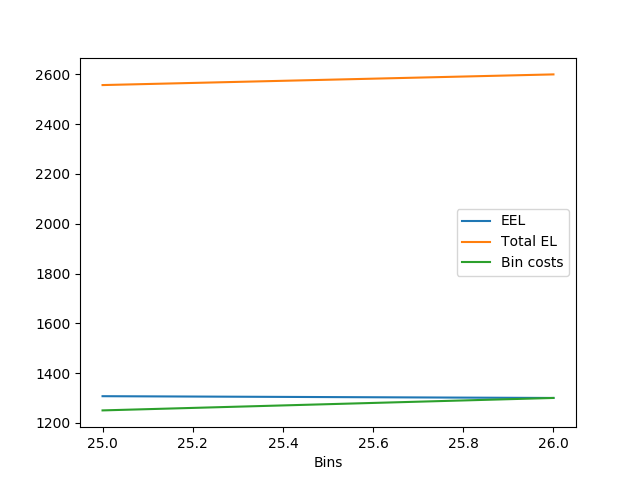

In [170]:
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
plt.figure()

y = range(25,27)
z = range(1250,1350,50)
a = [sum(i) for i in (zip(eel_G1_I1,z))]
plt.plot(y,eel_G1_I1, label = "EEL")
plt.plot(y,a,label = "Total EL")
plt.plot(y,range(1250,1350,50), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
plt.legend()

In [ ]:
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
plt.figure()

y = range(25,28)
z = range(1250,2600,100)
a = [sum(i) for i in (zip(x_2,z))]
plt.plot(y,x_2, label = "EEL")
plt.plot(y,a,label = "Total EL")
plt.plot(y,range(100,2600,100), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
plt.legend()

In [ ]:
r = [1344.2199999999998,
 1276.88,
 1272.0999999999997,
 1208.8999999999999,
 1176.02,
 1157.36,
 ]

In [ ]:
plt.figure()

y = range(25,50)
z = range(100,2600,100)
a = [sum(i) for i in (zip(xx_1,z))]
plt.plot(y,xx_1, label = "EEL")
plt.plot(y,a, label = "Total EL")
plt.plot(y,range(100,2600,100), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
plt.legend()
#ax.set_ylabel('Bin length')

In [ ]:
x_2 = [eel_pat(100,PR_2(100,m,items_1)) for m in range(25,50)]

In [ ]:
pattern_1 = [[61, 29, 10], [69, 28, 3], [74, 25],[85, 14], [88, 11], 
              [92, 7], [92, 7],[51, 49], [56, 44], [99],[99],[96],[96],
              [91],[87, 13],[76, 24],[72, 28],[40, 30, 30 ],[67, 33],[67, 33],
              [62, 21, 17],[52, 27, 20],[46, 23, 22],[86],[42, 40]]

In [ ]:
xx_1

## Solution set of Bin Length 1000

In [130]:
items_N1W4B2R0 = [131,131,131,131,130,130,128,128,127,125,125,125,121,119,119,119,118,117,116,113,111,110,109,109,108,108,
106,106,105,104,104,103,103,102,101,101,100,99,98,96,95,93,92,91,91,90,90,90,90,90]

pattern_N1W4B2R0 = [[131, 131, 131, 130, 130, 128, 128, 91], [131, 127, 125, 125, 125, 121, 119, 119], 
                    [118, 117, 116, 113, 111, 110, 109, 108, 98],[109, 108, 106, 105, 101, 100, 96, 95, 90, 90],
                    [119, 104, 104, 103, 103, 101, 93, 92, 91, 90], [106, 102, 99, 90, 90]]

items_N1W4B2R1 = [132,131,131,130,130,129,128,128,127,127,127,126,124,122,122,122,121,120,120,119,118,116,116,116,116,116,
114,113,111,110,108,107,104,104,101,101,99,97,95,95,95,94,93,92,92,92,92,91,91,91]

items_N1W4B2R2 = [132,132,132,131,130,129,128,126,124,123,123,123,122,121,120,119,119,118,118,118,118,115,113,113,110,109,
108,108,107,104,103,102,102,100,100,99,98,98,96,95,95,95,94,94,94,93,92,92,91,90]


items_N1W4B2R3 = [132,132,131,130,130,127,124,124,123,122,122,121,121,120,119,119,118,118,117,117,113,112,111,110,110,110,
109,109,109,106,105,103,103,103,101,101,98,98,98,97,97,97,97,96,95,94,94,92,91,91]

items_N1W4B2R4 = [130,129,129,128,128,126,126,125,124,124,124,122,121,121,121,120,120,119,119,116,114,114,114,114,112,112,
111,110,109,107,107,103,102,101,101,101,101,101,100,100,99,97,97,96,95,94,93,92,92,90]

items_N1W4B2R5 = [132,132,132,131,129,127,127,125,125,123,122,121,120,118,116,116,115,115,115,113,112,111,110,108,107,106,
105,105,105,104,103,102,102,101,99,99,99,98,97,96,96,95,94,93,93,93,92,92,91,90]

items_N1W4B2R6 = [131,131,131,128,127,126,126,124,123,122,122,120,119,118,118,117,117,116,115,115,114,114,113,112,111,110,
110,109,107,107,107,106,104,104,103,103,101,99,97,94,94,93,92,92,92,90,90,90,90,90]

items_N1W4B2R7 = [132,130,130,130,130,130,128,128,127,126,126,124,124,122,121,120,118,117,115,113,112,112,112,111,111,111,
111,110,109,109,108,108,105,105,105,101,100,99,99,98,96,95,94,94,94,93,92,92,92,90]

items_N1W4B2R8 = [131,131,128,127,127,126,124,123,123,122,120,119,119,115,113,113,112,112,112,111,110,109,109,108,105,105,
103,102,102,102,102,101,99,99,99,97,97,97,96,96,96,94,94,94,94,93,92,92,91,90]

items_N1W4B2R9 = [132,130,130,128,125,124,123,121,121,121,120,119,117,116,116,115,113,112,111,111,111,110,110,109,109,107,
107,106,106,105,104,102,102,101,101,100,99,98,97,96,96,95,95,94.92,92,92,91,91,90]

#eel_pat(1000,PR_2(1000,6,items_N1W4B2R0))

items = [99, 97, 95, 95, 94, 92, 91, 89, 86, 86, 85, 84, 80, 80, 80, 80, 80, 79, 76, 76, 75, 74, 73, 71, 71, 69, 65, 64
, 64, 64, 63, 63, 62, 60, 59, 58, 57, 54, 53, 52, 51, 50, 48, 48, 48, 46, 44, 43, 43, 43, 43, 42, 41, 40, 40, 39, 38, 38
, 38, 38, 37, 37, 37, 37, 36, 35, 34, 33, 32, 30, 29, 28, 26, 26, 26, 24, 23, 22, 21, 21, 19, 18, 17, 16, 16, 15, 14, 13
, 12, 12, 11, 9, 9, 8, 8, 7, 6, 6, 5, 1]

pattern = [[63, 37], [64, 32], [38, 37, 17, 8], [43, 39, 18], [84, 16], [85, 15], [69, 26, 5], [86, 14], [74, 26],
          [89, 11], [80, 12, 8],[80, 13, 7], [50, 38, 12], [80, 19], [91, 9], [44, 40, 16], [75, 24], [64, 36], [94, 6],
          [92, 6], [48, 43, 9], [71, 29], [62, 38], [63, 37], [60, 40], [65, 35], [99], [57, 43], [97], [95], [95],
          [76, 23], [79, 21], [95], [71, 28], [52, 48], [59, 41], [73, 26], [54, 46], [37, 33, 30], [58, 42], [51, 48], 
          [76, 22], [53, 43], [86], [80], [80], [38, 21]]

item_N2W4B3R0 = [209, 206, 205, 201, 197, 191, 191, 190, 187, 187, 186, 184, 183, 182, 182, 182, 178, 176, 174, 172, 171
, 171, 171, 169, 166, 164, 162, 161, 161, 156, 155, 155, 152, 149, 147, 144, 142, 136, 132, 131, 125, 124, 122, 121, 117
, 117, 115, 113, 113, 110, 104, 103, 101, 101, 100, 96, 96, 95, 95, 92, 87, 83, 77, 77, 76, 72, 70, 70, 70, 68, 68, 66
, 65, 62, 59, 56, 55, 54, 51, 49, 47, 44, 43, 43, 42, 41, 41, 40, 39, 37, 34, 34, 31, 31, 30, 26, 26, 20, 14, 13]



In [98]:
eel_pat(1000,pattern_N1W4B2R0)

904.692

In [120]:
eel_pat(1000,PR_1(1000, 48,items))

2294.5400000000004

In [121]:
eel_pat(100,PR_1(100,49,items))

2268.8399999999997

In [122]:
eel_pat(100,PR_1(100,50,items))

2252.78

In [127]:
eel_pat(100,PR_1(100,51,items))

2291.4399999999996

In [126]:
len(PR_1(100,51,items))

51

In [ ]:
eel_pat
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
plt.figure()

y = range(25,29)
z = range(1250,1450,50)
a = [sum(i) for i in (zip(eel_G1_I1,z))]
plt.plot(y,eel_G1_I1, label = "EEL")
plt.plot(y,a,label = "Total EL")
plt.plot(y,range(1250,1450,50), label = "Bin costs")
ax = plt.gca()
ax.set_xlabel('Bins')
plt.legend()

In [ ]:
eel_pat(1000,PR_1(1000, 12,item_N2W4B3R0))

In [132]:
eel_pat(1000,PR_1(1000, 13,item_N2W4B3R0))

1971.0

In [ ]:
len(PR_1(1000, 13,item_N2W4B3R0))

In [133]:
eel_pat(1000,PR_1(1000, 14,item_N2W4B3R0))

KeyboardInterrupt: 

In [128]:
len(PR_1(100,52,items))

52

In [124]:
eel_pat(100,PR_1(100,52,items))

2273.92

In [125]:
eel_pat(100,PR_1(100,53,items))

2310.28

In [74]:
eel(100,[45, 43, 12])

31.22

In [100]:
eel_pat(1000,PR_1(1000,7,items_N1W4B2R0))

1521.0

In [ ]:
I_N1C1W1_B = [100,99,97,97,97,93,93,92,92,88,83,83,79,76,76,75,72,71,70,69,67,66,63,62,62,61,61,51,50,44,44,
                 43,43,40,39,37,37,30,23,20,19,18,17,15,14,13,13,12,8,8]

P_N1C1W1_B = [[92, 8],[92, 8],[88, 12],[83, 17],[100],[72, 15, 13],[70, 30],[67, 19, 14],[62, 20, 18],
                      [40, 37, 23],[63, 37],[44, 43, 13],[61, 39],[99],[97],[97],[97],[51, 44],[50,43],[93],[93],
                      [83],[79],[76],[76],[75],[71],[69],[66],[62],[61]]

In [ ]:
eel_pat(100,P_N1C1W1_B)

In [ ]:
len(I_N1C1W1_B)

In [ ]:
[eel_pat(100,PR_1(100,m,I_N1C1W1_B)) for m in range(31,36)]

In [ ]:
pattern_N1W4B2R0 = [[199, 199, 196, 192, 191, 23],[190, 175, 175, 172, 166, 103, 19 ],[160, 158, 151, 149, 148, 140, 94],
                   [135, 134, 126, 121, 113, 113, 94, 93, 37, 21, 13 ],[209, 87, 84, 82, 77, 69, 67, 64, 60, 60,
                    60, 45, 22, 14],[54, 52, 35, 32, 18]]

In [ ]:
eel_pat(1000, pattern_N1W4B2R0)

In [ ]:
PR_1(1000,6,items_N1W4B2R0)

In [ ]:
eel_pat(1000,PR_1(1000,6,items_N1W4B2R0))

In [ ]:
1000,PR_1(1000,7,items_N1W4B2R0)

In [ ]:
eel_pat(1000,PR_1(1000,7,items_N1W4B2R0))

In [ ]:
PR_1(1000,8,items_N1W4B2R0)

In [ ]:
eel_pat(1000,PR_1(1000,8,items_N1W4B2R0))

In [ ]:
PR_1(1000,9,items_N1W4B2R0)

In [ ]:
eel_pat(1000,PR_1(1000,9,items_N1W4B2R0))

In [ ]:
PR_1(1000,10,items_N1W4B2R0)

In [ ]:
eel_pat(1000,PR_1(1000,10,items_N1W4B2R0))

In [ ]:
PR_1(1000,6,items_N1W4B2R0)

In [ ]:
eel_pat(1000,PR_1(1000,11,items_N1W4B2R0))

In [ ]:
eel_pat(1000,PR_1(1000,12,items_N1W4B2R0))

In [ ]:
eel_pat(1000,PR_1(1000,6,items_N1W4B2R0))

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_N1W4B2R0)) for m in range(6,15)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_1)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_1)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_2)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_2)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_3)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_3)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_4)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_4)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_5)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_5)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_6)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_6)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_7)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_7)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_8)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_8)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_1(1000,m,items_1000_9)) for m in range(6,60)]

In [ ]:
[eel_pat(1000,PR_2(1000,m,items_1000_9)) for m in range(6,60)]

In [ ]:
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt

In [ ]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(eff2(100,25,items_1)))
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.2)
r_val = [item-0.2 for item in xvals]
r = [sum(data) for data in pattern_1]   
rr = [sum(data) for data in eff2(100,25,items_1)]
rrr = [sum(data) for data in eff1(100,25,items_1)]
plt.bar(r_val, r, width = 0.2, color='g')
plt.bar(xvals, rr, width = 0.2, color='b')# title ='Min C_max')
plt.bar(new_xvals, rrr, width = 0.2, color='r')# title='Min C_max-C_min')
ax = plt.gca()
ax.set_xlabel('Bin')
ax.set_ylabel('Bin length')
ax.set_title('Pattern sizes when using Min C_max vs. Min C_max-C_min')

In [ ]:
import numpy as np
# stacked bar charts are also possible
plt.figure()
xvals = range(1,len(eff2(100,27,w))+1)
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.2)
rr = [sum(data) for data in eff2(100,27,w)]
rrr = [sum(data) for data in eff1(100,27,w)]
plt.bar(xvals, rr, width = 0.2, color='b');
plt.bar(new_xvals, rrr, width = 0.2, color='r');
#plt.legend()

In [ ]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(eff2(100,28,w)))
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.2)
rr = [sum(data) for data in eff2(100,28,w)]
rrr = [sum(data) for data in eff1(100,28,w)]
plt.bar(xvals, rr, width = 0.2, color='b')
plt.bar(new_xvals, rrr, width = 0.2, color='r')
#plt.legend()

In [ ]:
plt.figure()
y = [i*2 for i in range(5)]
x = np.array(range(5))
plt.scatter(x,y)
plt.show()

In [ ]:
b=plt.plot(x,y)

In [ ]:
w = [50,99,99,96,96,92,92,91,88,87,86,85,76,74,72,69,67,67,62,61,56,52,51,49,46,
     44,42,40,40,33,33,30,30,29,28,28,27,25,24,23,22,21,20,17,14,13,11,10,7,7,3]
len(w)

In [ ]:
\text{max} \sum_{j=1}^n nabla_i(x_i^{l} + x_i^{r})
		x_i^{l} + x_i^{r}\le 1,  \quad i = 1,...,n = |P|
		\sum_{i=1}^n nabla_i x_i^{l}\le t
		\sum_{i=1}^n nabla_i x_i^{r}\le w-t
		x_i^{l} \ge 0, \quad x_i^{r} \ge 0 \quad \text{and integer} 
		\label{bpp39}

In [ ]:
100
99
97
97
97
93
93
92
92
88
83
83
79
76
76
75
72
71
70
69
67
66
63
62
62
61
61
51
50
44
44
43
43
40
39
37
37
30
23
20
19
18
17
15
14
13
13
12
8
8

In [ ]:
[52, 48], [75, 15, 10], [82, 18], [67, 26, 7], 
[47, 38, 15], [63, 34, 3], [81, 19], [92, 8], [73, 21], [87, 13], [89, 11], [56, 34, 10], [82, 10, 8], [71, 29],
[84, 9, 6], [59, 35, 6], [41, 39, 20], [67, 30], [49, 46], [57, 36]